# A Linear and Non Linear Regression technique to Predict the Target Variable

#Name: Seshadri Deb Roy

In [1]:
#Importing the packages

import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import pandas as pd
import numpy as np
import pylab
import plotly.express as px
import seaborn as sns
import matplotlib
sns.set(style="ticks", color_codes=True, font_scale=1.5)
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
%matplotlib inline
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
from graphviz import Source
from IPython.display import Image

import sklearn
import scipy
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler, PolynomialFeatures, MinMaxScaler

In [2]:
#importing dataset
df=pd.read_csv('C:/Users/DELL/Downloads/Tooltest-dataset.csv')

In [3]:
# See the number of rows and columns
print("Rows, columns: " + str(df.shape))
# See the first five rows of the dataset
df.head()

Rows, columns: (4898, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  Target  
0      8.8       0  
1      9.5       0  
2     10.1       0  
3      9.9       0  
4      9.9       0

#From the data we see that the Target variable is binary in nature.
#Assumption made is that 0 indicates "Bad wine" and 1 indicates "Good Wine".
#The target variable is assumed to indicate the quality of wine.

In [4]:
#Renaming variables
df=df.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'})
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  Target  
0      8.8       0  
1      9.5       0  
2     10.1       0  
3      9.9       0  
4      9.9       0

#There are 4898 rows and 12 columns
#11 predictors and 1 response variable 

In [5]:
# Missing Values
print(df.isna().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Target                  0
dtype: int64


#No missing values

In [6]:
#descriptive statistics of the variables
df.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol       Target  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     0.216415  
std       0.151001     0.114126     1.230621     0.411842  
min       2.720000     0.220000     8.000000     0.000000  
25%       3.090000     0.410000     9.500000     0.000000  
50%       3.180000     0.470000    10.400000     0.000000  
75%       3.280000     0.550000    11.400000     0.000000  
max       3.820000     1.080000    14.200000     1.000000

In [7]:
# re-shuffle records just to randomize data points
df = df.sample(frac=1, random_state=101).reset_index(drop=True)

In [8]:
#Check thye descriptive statistics as per target variable
subset_attributes = df.columns
bad_wine = round(df.loc[df.Target == 0, subset_attributes].describe(),2)
good_wine = round(df.loc[df.Target == 1, subset_attributes].describe(),2)
pd.concat([bad_wine, good_wine], axis=0, keys=['Bad Wine Statistics', 'Good Wine Statistics']).T

Bad Wine Statistics                                       \
                                   count    mean    std   min     25%     50%   
fixed_acidity                     3838.0    6.89   0.86  3.80    6.30    6.80   
volatile_acidity                  3838.0    0.28   0.10  0.08    0.22    0.27   
citric_acid                       3838.0    0.34   0.13  0.00    0.26    0.32   
residual_sugar                    3838.0    6.70   5.23  0.60    1.70    6.00   
chlorides                         3838.0    0.05   0.02  0.01    0.04    0.04   
free_sulfur_dioxide               3838.0   35.52  17.79  2.00   23.00   34.00   
total_sulfur_dioxide              3838.0  141.98  44.15  9.00  111.00  140.00   
density                           3838.0    0.99   0.00  0.99    0.99    0.99   
pH                                3838.0    3.18   0.15  2.72    3.08    3.17   
sulphates                         3838.0    0.49   0.11  0.23    0.41    0.47   
alcohol                           3838.0   10.27   1.10  8.00    9.40   10.00   
Target                            3838.0    0.00   0.00  0.00    0.00    0.00   

                                     Good Wine Statistics                 \
                         75%     max                count    mean    std   
fixed_acidity           7.40   14.20               1060.0    6.73   0.77   
volatile_acidity        0.32    1.10               1060.0    0.27   0.09   
citric_acid             0.40    1.66               1060.0    0.33   0.08   
residual_sugar         10.40   65.80               1060.0    5.26   4.29   
chlorides               0.05    0.35               1060.0    0.04   0.01   
free_sulfur_dioxide    47.00  289.00               1060.0   34.55  13.80   
total_sulfur_dioxide  173.00  440.00               1060.0  125.25  32.72   
density                 1.00    1.04               1060.0    0.99   0.00   
pH                      3.27    3.81               1060.0    3.22   0.16   
sulphates               0.54    1.06               1060.0    0.50   0.13   
alcohol                11.00   14.00               1060.0   11.42   1.26   
Target                  0.00    0.00               1060.0    1.00   0.00   

                                                             
                        min     25%     50%     75%     max  
fixed_acidity          3.90    6.20    6.70    7.20    9.20  
volatile_acidity       0.08    0.19    0.25    0.32    0.76  
citric_acid            0.01    0.28    0.31    0.36    0.74  
residual_sugar         0.80    1.80    3.88    7.40   19.25  
chlorides              0.01    0.03    0.04    0.04    0.14  
free_sulfur_dioxide    5.00   25.00   33.00   42.00  108.00  
total_sulfur_dioxide  34.00  101.00  122.00  146.00  229.00  
density                0.99    0.99    0.99    0.99    1.00  
pH                     2.84    3.10    3.20    3.32    3.82  
sulphates              0.22    0.40    0.48    0.58    1.08  
alcohol                8.50   10.70   11.50   12.40   14.20  
Target                 1.00    1.00    1.00    1.00    1.00

#Inference
#The residual sugar and the total sulfur dioxide mean in good wine is considerably lesser than found in bad wine.
#The Volatile acidity and chlorides are less in quantity in good wine and with lesser standard deviation.

In [9]:
# CHeck the distribution of the target variable so as to know whether the good wine is more in number.
fig = px.histogram(df,x='Target')
fig.show()
#The dependent variable is binary in nature and the good wines are less in number around 1000 compared to 3800 of bad wines.

In [10]:
#Inferential statistics: Anova Test
from scipy.stats import f_oneway
def type_inf_stat_test(feature):
    F, p = f_oneway(df[df.Target == 0][feature], 
                    df[df.Target == 1][feature])
    if p <= 0.05:
        msg = 'Reject'
    else:
        msg = 'Acept'
    print('F Statistic: {:.2f} \tp-value: {:.3f} \tNull Hypothesis: {}'.format(F, p, msg))

In [11]:
print('ANOVA test across wine samples with different types:\n')
# - Mean residual sugar and total sulfur dioxide content in good wine seems to be much higher than bad wine.
type_inf_stat_test('residual_sugar')
type_inf_stat_test('total_sulfur_dioxide')
#- Mean value of sulphates, fixed acidity and volatile acidity seem to be higher in good wine as compared to bad wine.
type_inf_stat_test('sulphates')
type_inf_stat_test('fixed_acidity')
type_inf_stat_test('volatile_acidity')
#- From all numbers, we can observe that citric acid is more present in white than bad wines.
type_inf_stat_test('citric_acid')
#- In general, white wines has half concentrations of chlorides then bad wines.
type_inf_stat_test('chlorides')
#- Although in Ph the difference seems small it is interesting to note that it is slightly larger in bad wines.
type_inf_stat_test('pH')

ANOVA test across wine samples with different types:

F Statistic: 68.05 	p-value: 0.000 	Null Hypothesis: Reject
F Statistic: 132.29 	p-value: 0.000 	Null Hypothesis: Reject
F Statistic: 11.03 	p-value: 0.001 	Null Hypothesis: Reject
F Statistic: 32.13 	p-value: 0.000 	Null Hypothesis: Reject
F Statistic: 22.23 	p-value: 0.000 	Null Hypothesis: Reject
F Statistic: 6.12 	p-value: 0.013 	Null Hypothesis: Reject
F Statistic: 169.87 	p-value: 0.000 	Null Hypothesis: Reject
F Statistic: 43.19 	p-value: 0.000 	Null Hypothesis: Reject


#The alternative hypotheses, HA,holds true which tells us that there exists at least two group means that are statistically significantly different from each other.

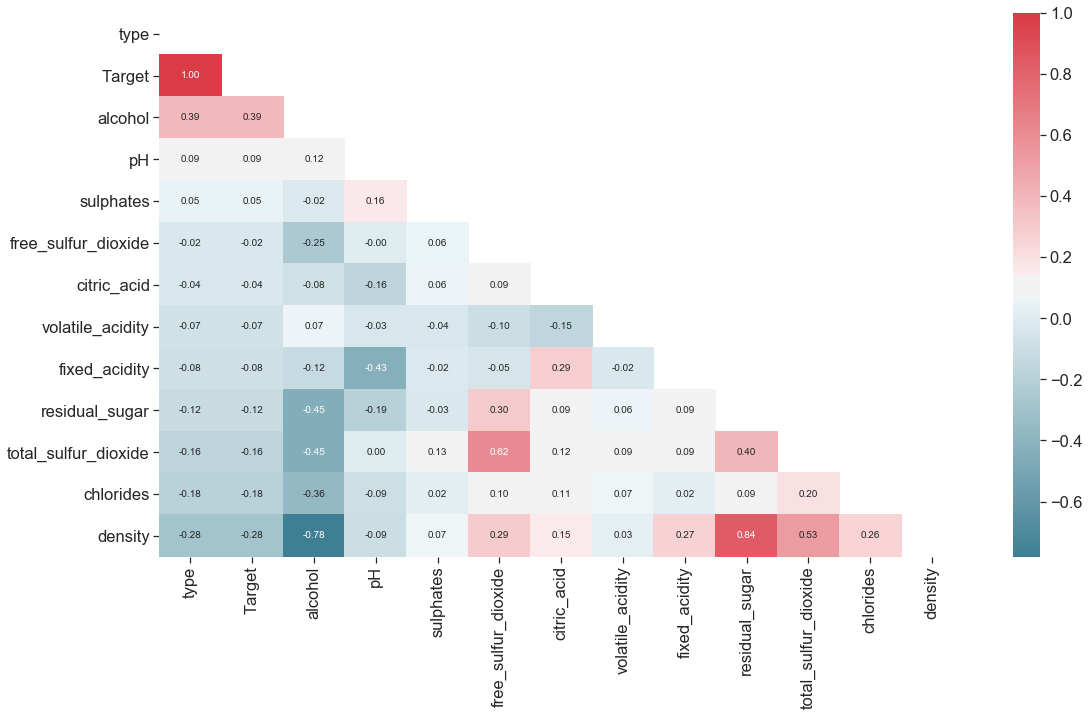

In [12]:
#Check correlation


# re-shuffle records just to randomize data points
df = df.sample(frac=1, random_state=101).reset_index(drop=True)

class_tp = LabelEncoder()
y_tp = class_tp.fit_transform(df.Target.values) 
df['type'] = y_tp

#class_ql = {'low':0, 'medium': 1, 'high': 2}
#y_ql = wines.quality_label.map(class_ql)


corr = df.corr()
top_corr_cols = corr.type.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(18, 10))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1.5)
plt.show()
del corr, dropSelf, top_corr

#Alcohol has high negative correlation with density (-0.78) followed by residual sugar (-0.45) and total sulfur dioxide (-0.45).
#free sulphur dioxide has high correlation with total sulfur dioxide and it may be harmful for the model.
#Residual sugar and Density is highly correlated at 0.84.

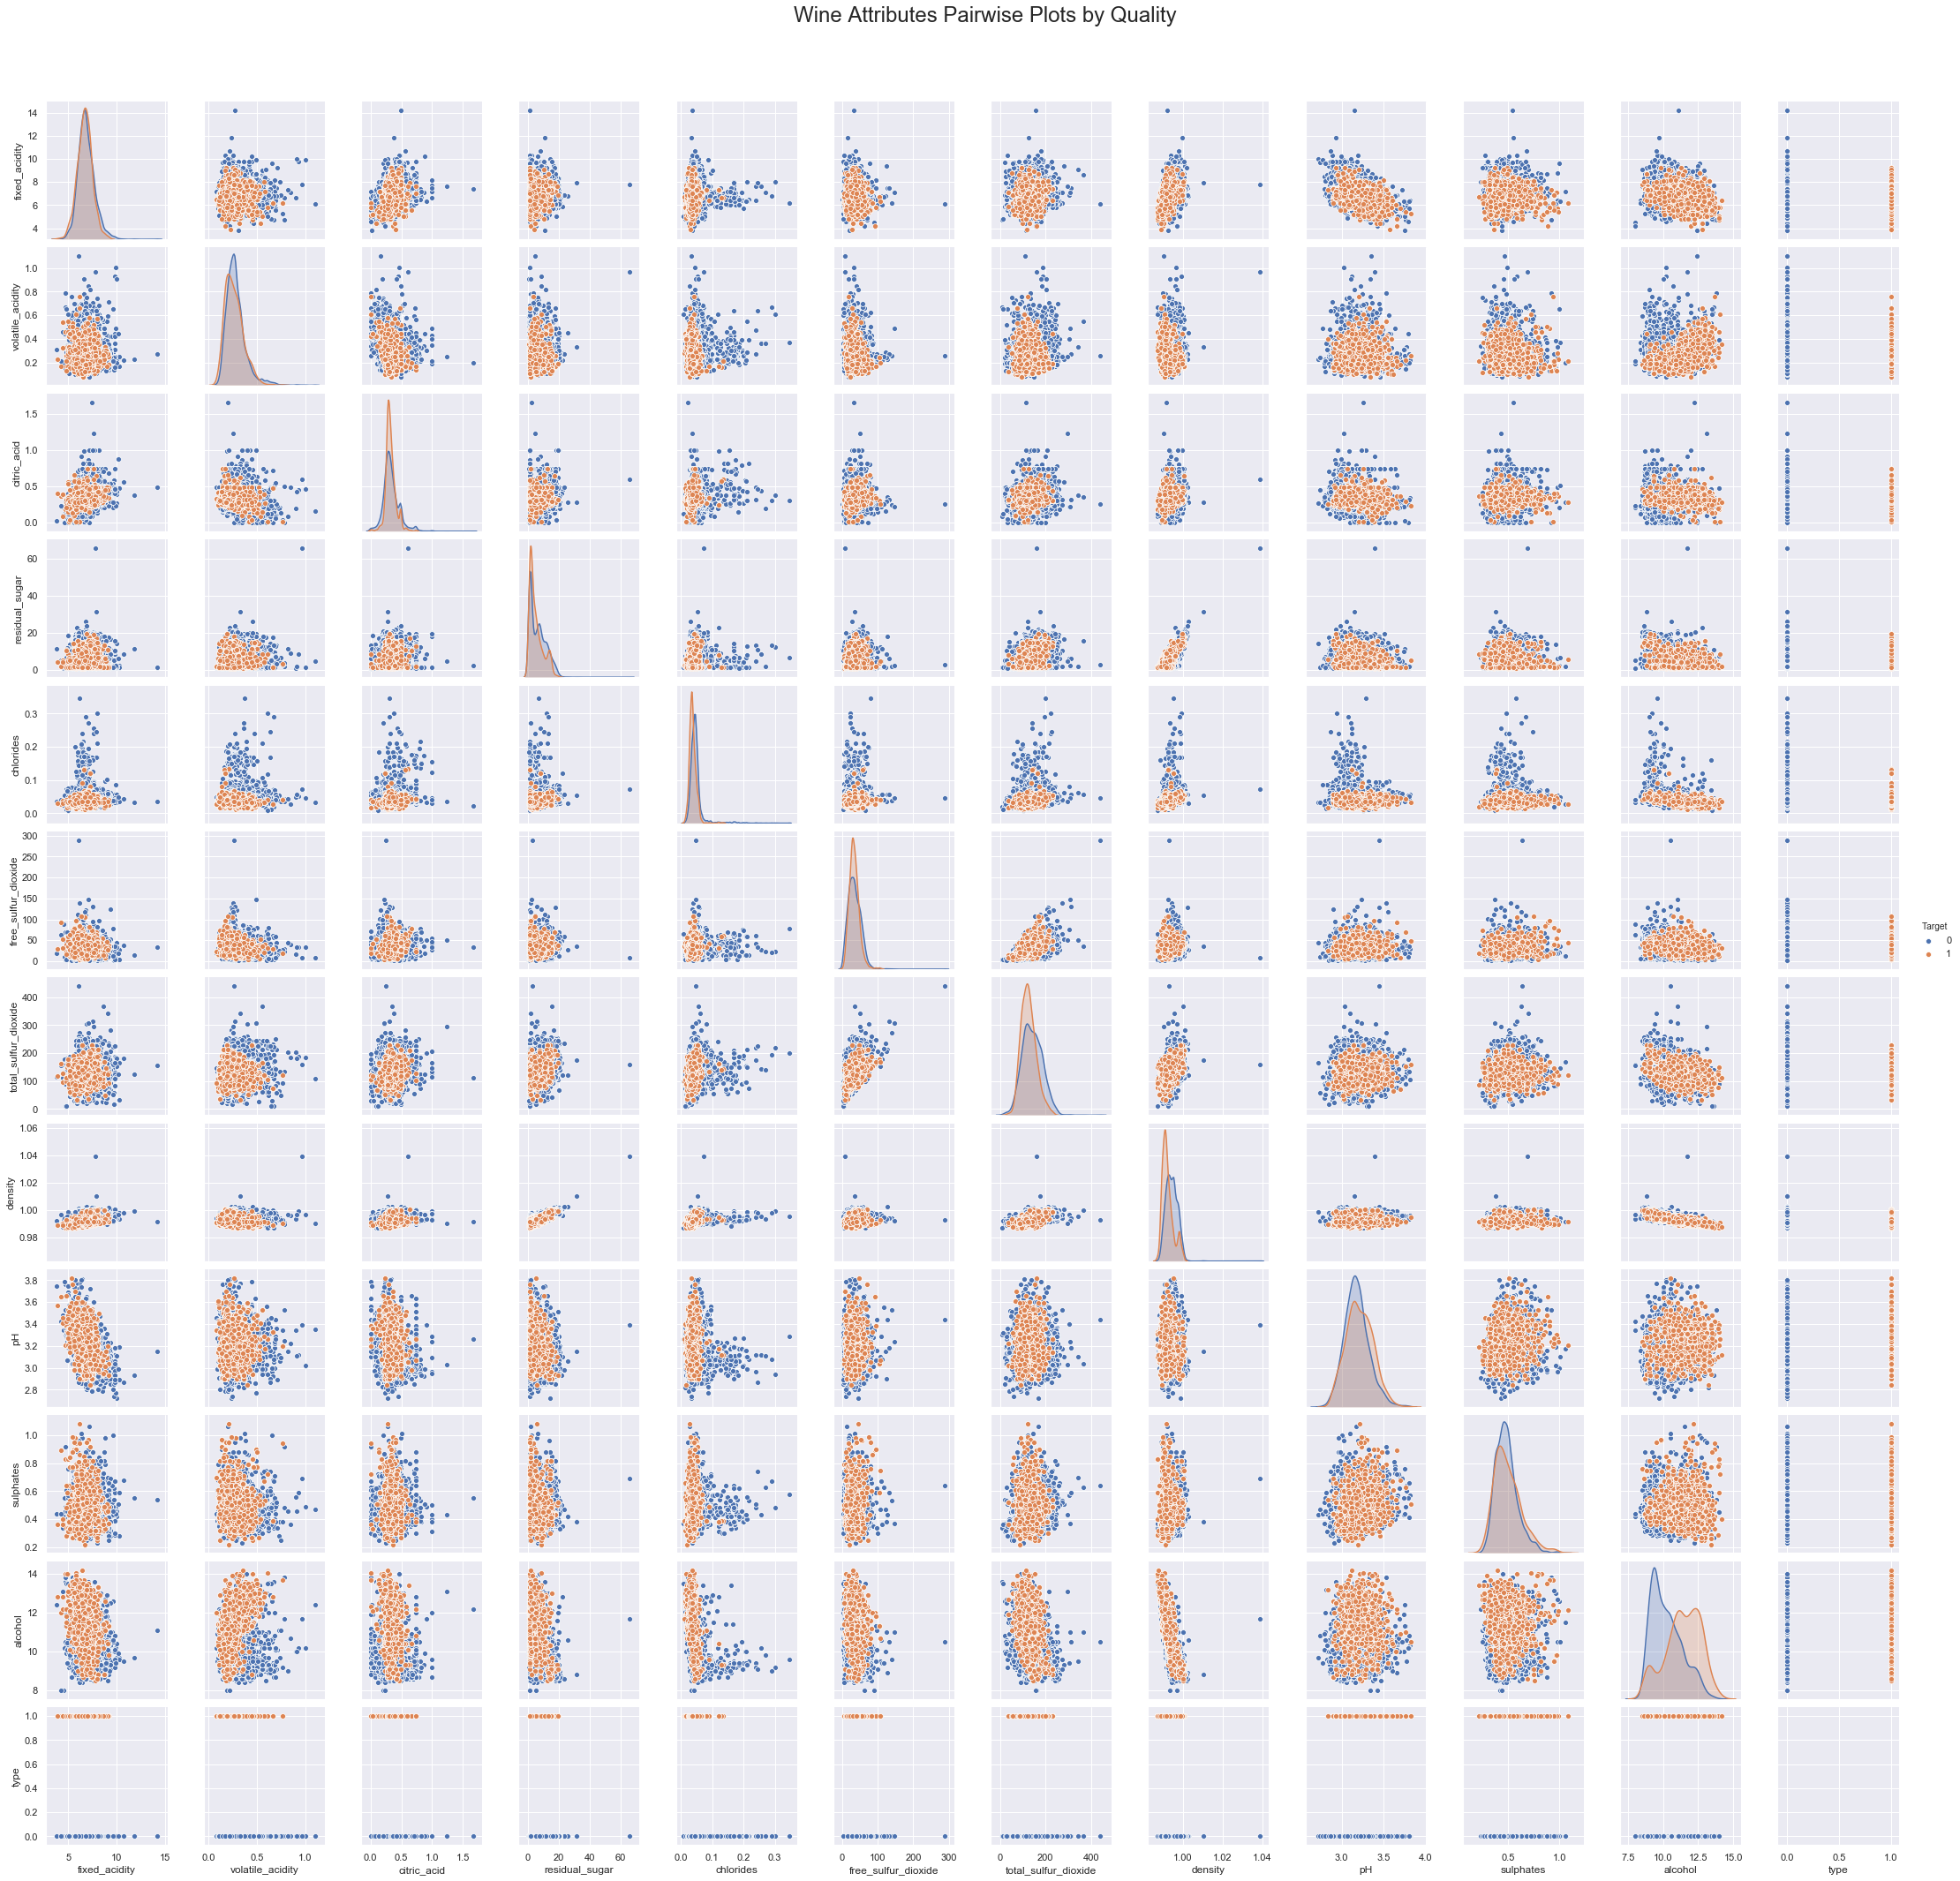

In [13]:
#Pairwise Plot
sns.set(font_scale=1.0)
cols = df.columns
#cols = cols.drop('Target')
g = sns.pairplot(data = df.loc[:, cols], hue='Target')
fig = g.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots by Quality', fontsize=24)

plt.show()

#Lower sulphate levels in wines with good quality ratings, but the highest are found in the low quality
#Lower levels of volatile acids in wines with good quality ratings

#Although the correlation of the most of the variables is low with Target variable.

# Linear Regression - Logistic Regression

#Since the target variable is binary in nature it violates the linear regression assumption. In here, we need to go for Logistic regression which is a kind of linear regression for Binary dependant variable.

#Preprocessing for the Model

In [14]:


# Separate feature variables and target variable
X = df.drop(['Target','type'], axis = 1)
y = df['Target']

#standardizing the data
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

df_scale=StandardScaler().fit_transform(df)
df_scale[10:12]

array([[ 1.4757511 , -1.57009756,  1.28759423, -1.02363678, -0.17268156,
         0.45232188,  0.50923618, -0.2097827 , -0.38590965, -0.08628968,
        -0.66173945, -0.52553355, -0.52553355],
       [ 0.64615301, -0.57787912, -0.6131152 ,  0.47492185, -0.85931436,
        -0.72377504, -0.62034234, -0.31009697, -1.37938461, -0.69971036,
         0.71981845, -0.52553355, -0.52553355]])

In [15]:
#df = df.drop(['type'], axis = 1)

from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(df,test_size=0.25,random_state=42)

import statsmodels.api as sm
from statsmodels.formula.api import logit

formula=('Target~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide +total_sulfur_dioxide + density + pH +sulphates + alcohol')
model=logit(formula=formula,data=train_data).fit_regularized()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4216010216386241
            Iterations: 118
            Function evaluations: 125
            Gradient evaluations: 118


In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                 3673
Model:                          Logit   Df Residuals:                     3661
Method:                           MLE   Df Model:                           11
Date:                Mon, 13 Jul 2020   Pseudo R-squ.:                  0.1988
Time:                        12:26:37   Log-Likelihood:                -1548.5
converged:                       True   LL-Null:                       -1932.7
Covariance Type:            nonrobust   LLR p-value:                1.171e-157
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              659.5983    107.077      6.160      0.000     449.732     869.465
fixed_acidity            0.5705      0.104      5.493      0.000       0.367       0.774
volatile_acidity        -3.9953      0.569     -7.021      0.000      -5.111      -2.880
citric_acid             -0.4748      0.471     -1.009      0.313      -1.397       0.448
residual_sugar           0.3128      0.041      7.684      0.000       0.233       0.393
chlorides              -14.7313      4.646     -3.170      0.002     -23.838      -5.624
free_sulfur_dioxide      0.0087      0.004      2.441      0.015       0.002       0.016
total_sulfur_dioxide    -0.0008      0.002     -0.491      0.623      -0.004       0.003
density               -683.8006    108.538     -6.300      0.000    -896.531    -471.070
pH                       3.7243      0.491      7.588      0.000       2.762       4.686
sulphates                2.1944      0.403      5.441      0.000       1.404       2.985
alcohol                  0.1230      0.129      0.950      0.342      -0.131       0.377
========================================================================================
"""

#From the summary we can conclude:
#citric_acid,total sulfur dioxide and alcohol has insignificant impact on the quality of the wine as the p value is large.
#we can conclude 1 unit of increase in fixed acidity will in increase the log of odds of producing a good wine by 0.5265.
##we can conclude 1 unit of increase in volatile acidity will in decrease the log of odds of producing a good wine by 3.6096.



In [17]:
#Excluding insignificant variables second logit model
formula=('Target~ fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + density + pH +sulphates')
model1=logit(formula=formula,data=train_data).fit_regularized()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4218693331137487
            Iterations: 99
            Function evaluations: 103
            Gradient evaluations: 99


In [18]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                 3673
Model:                          Logit   Df Residuals:                     3664
Method:                           MLE   Df Model:                            8
Date:                Mon, 13 Jul 2020   Pseudo R-squ.:                  0.1983
Time:                        12:26:38   Log-Likelihood:                -1549.5
converged:                       True   LL-Null:                       -1932.7
Covariance Type:            nonrobust   LLR p-value:                3.593e-160
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             755.7606     40.284     18.761      0.000     676.805     834.716
fixed_acidity           0.6189      0.074      8.339      0.000       0.473       0.764
volatile_acidity       -3.8703      0.540     -7.172      0.000      -4.928      -2.813
residual_sugar          0.3446      0.023     15.254      0.000       0.300       0.389
chlorides             -14.6608      4.619     -3.174      0.002     -23.714      -5.608
free_sulfur_dioxide     0.0074      0.003      2.626      0.009       0.002       0.013
density              -780.9694     41.585    -18.780      0.000    -862.475    -699.464
pH                      3.9977      0.385     10.372      0.000       3.242       4.753
sulphates               2.2859      0.382      5.981      0.000       1.537       3.035
=======================================================================================
"""

#From the second model all the variables included are having significant impact on the quality of wine.
##The interpretation of coefficients in the log-odds term does not make much sense.So let's look into log of odds ratio.

In [19]:
#Log of odds ratio.
print(np.exp(model1.params))

Intercept                       inf
fixed_acidity          1.856817e+00
volatile_acidity       2.085249e-02
residual_sugar         1.411439e+00
chlorides              4.294511e-07
free_sulfur_dioxide    1.007471e+00
density                0.000000e+00
pH                     5.447215e+01
sulphates              9.834110e+00
dtype: float64


#Odds ratio is calculated by taking the exponent of the coefficients.
#In here we can conclude that one unit increase in fixed acidity label increases the odds of producing quality wine by 1.872935 times.
#one unit increase in volatile acidity label increases the odds of producing quality wine by 0.036613 times.
#one unit increase in residual_sugar label increases the odds of producing quality wine by 1.37 times.
#one unit increase in chlorides label increases the odds of producing quality wine by 0.000060 times.
#one unit increase in free_sulfur_dioxide label increases the odds of producing quality wine by 1.010660 times.
#one unit increase in density label will not improve the odds of producing quality wine.
#one unit increase in pH label increases the odds of producing quality wine by 44.810027 times.
#one unit increase in sulphates label increases the odds of producing quality wine by 7.107094 times.


#However the marginal effects are more important than the log of odds or the odds ratio. So let's look into that.

In [20]:
#Average Marginal effect

AME=model1.get_margeff(at='overall',method='dydx')
print(AME.summary())

        Logit Marginal Effects       
Dep. Variable:                 Target
Method:                          dydx
At:                           overall
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
fixed_acidity           0.0837      0.010      8.576      0.000       0.065       0.103
volatile_acidity       -0.5237      0.072     -7.302      0.000      -0.664      -0.383
residual_sugar          0.0466      0.003     17.072      0.000       0.041       0.052
chlorides              -1.9836      0.623     -3.183      0.001      -3.205      -0.762
free_sulfur_dioxide     0.0010      0.000      2.634      0.008       0.000       0.002
density              -105.6656      4.681    -22.575      0.000    -114.840     -96.492
pH                      0.5409      0.050     10.865      0.000       0.443       0.638
sulphates               0.3093      0.051      6.080    

#Interpretation of Average Marginal Effects;


#a unit increase in fixed acidity value increases the probability of producing good quality wine by 8.55%.
#a unit increase in volatile_acidity value decreases the probability of producing good quality wine by 45%.
#a unit increase in residual_sugar value increases the probability of producing good quality wine by 4.35%.
#a unit increase in free_sulfur_dioxide value increases the probability of producing good quality wine by 0.14%.
#a unit increase in pH value increases the probability of producing good quality wine by 51.78%.
#a unit increase in sulphates value increases the probability of producing good quality wine by 26.71%.


#From the above we can conclude density increase will impact the quality of wine drastically. Whereas all the variables are having significant impact on the quality of wine.


In [21]:
#Model evaluation
#model_prediction
prediction=model1.predict(exog=test_data)

#Define cut_off
cutoff=0.5

#compute class prediction: y predictions

y_prediction=np.where(prediction>cutoff,1,0)
y_actual=test_data['Target']


#confusion matrix

conf_matrix=pd.crosstab(y_actual,y_prediction,rownames=['Actual'],colnames=['Predicted'],margins=True)

#Print the confusion Matrix
print(conf_matrix)

Predicted     0    1   All
Actual                    
0           908   63   971
1           189   65   254
All        1097  128  1225


Text(0.5, 257.44, 'Predicted label')

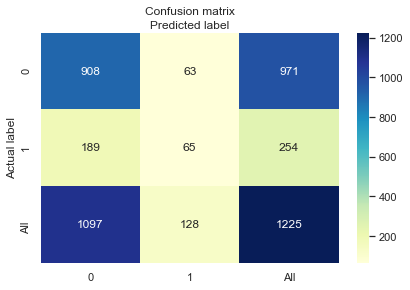

In [22]:
#Visualizing the Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#From the Confusion Matrix we conclude:
#908 and 65 are correct predicted and 189 and 63 are incorrectly predicted.

#Accuracy of training data

In [23]:
#Accuracy of training data

#Model evaluation
#model_prediction
pred=model1.predict(exog=train_data)

#Define cut_off
cutoff=0.5

#compute class prediction: y predictions

y_pred=np.where(pred>cutoff,1,0)
y_actual_train=train_data['Target']

#Model evaluation using Confusion Matrix

# import the metrics class
from sklearn import metrics

#Evaluation of Accuracy,Precision and Recall
print("Accuracy:",metrics.accuracy_score(y_actual_train, y_pred))
print("Precision:",metrics.precision_score(y_actual_train, y_pred))
print("Recall:",metrics.recall_score(y_actual_train, y_pred))

Accuracy: 0.802341410291315
Precision: 0.5966183574879227
Recall: 0.3064516129032258


#Accuracy of Training data is 80.23%.

In [24]:
#Accuracy of test data
#Model evaluation using Confusion Matrix

# import the metrics class
from sklearn import metrics

#Evaluation of Accuracy,Precision and Recall
print("Accuracy:",metrics.accuracy_score(y_actual, y_prediction))
print("Precision:",metrics.precision_score(y_actual, y_prediction))
print("Recall:",metrics.recall_score(y_actual, y_prediction))

Accuracy: 0.7942857142857143
Precision: 0.5078125
Recall: 0.2559055118110236


#Accuracy score of Test data is 79.42%

#Test accuracy is lower than training accuracy but close which interprets than model is good.

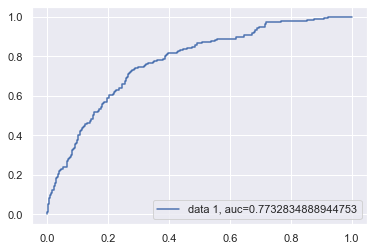

In [25]:
#Removing Target variable from Test data
X_test = test_data.drop(['Target'], axis = 1)



#Measuring the ROC Curve

y_pred_proba = model1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_actual,  y_pred_proba)
auc = metrics.roc_auc_score(y_actual, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#From the ROC curve we conclude the AUC score equal to 0.77328 is a good classifier and the higher the area under the curve the better,
#From the ROC curve it seems to be a good classifier.

In [26]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_actual, y_prediction))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       971
           1       0.51      0.26      0.34       254

    accuracy                           0.79      1225
   macro avg       0.67      0.60      0.61      1225
weighted avg       0.76      0.79      0.77      1225



In [27]:

#Preprocessing for the Model

# Separate feature variables and target variable
X = df.drop(['Target','type'], axis = 1)
y = df['Target']

#standardizing the data
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)


#Splitting the data into Test and Training dataset.

# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [28]:
#Making Predictions
#In here X consists of the scaled feactures excluding the Target variable and Y_new is predicted outputs.

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)



ynew = logreg.predict(X)
print(ynew[1:10])
# show the inputs and predicted outputs
for i in range(len(X)):
	print("X=%s, Predicted=%s" % (X[i], ynew[i]))

[0 0 0 0 1 0 0 0 0]
X=[ 1.59426511 -0.47865728  0.29591974 -1.0039189  -0.17268156  0.2171025
 -0.50267791 -0.41041123 -1.31315295 -1.13786799 -0.41793512], Predicted=0
X=[-1.01304317  0.51356116 -1.10895244 -0.90532952 -0.67621228  0.80515096
  0.48570329 -0.71135403  1.46857694  0.35186795  0.394746  ], Predicted=0
X=[-0.77601514 -0.9747665   1.28759423 -0.37294685  0.05619604 -1.07660412
 -1.13806583 -0.71135403  0.54133365 -1.05023647  0.88235467], Predicted=0
X=[ 1.35723709e+00  6.12783009e-01 -6.95754741e-01  1.69280668e-03
 -4.93110199e-01  1.58297652e-01 -8.32138311e-01 -8.51793999e-01
 -1.84300626e+00 -2.27707783e+00  1.36996334e+00], Predicted=0
X=[-1.72412724 -0.72671189 -1.4395106   1.21434222  0.23929812 -0.25333627
 -0.54974368  0.53923048  1.40234528 -0.96260494  0.23220977], Predicted=0
X=[ 0.05358295 -0.37943543 -0.86103382  0.13971794 -0.21845708 -0.90018958
 -0.97333563 -0.52410073 -0.58460464  3.15607678  0.71981845], Predicted=1
X=[ 0.76466702 -0.87554465  1.287594

  0.60336772 -0.44719313  0.47510198 -0.26155273  1.36996334], Predicted=0
X=[ 1.12020906  1.40655776 -0.86103382  0.47492185  0.37662468  0.39351704
  1.80354489  1.02742657 -1.11445795  0.79002558 -1.06808001], Predicted=0
X=[-0.4204731  -0.57787912 -0.69575474  2.11150561  0.1935226   0.51112673
 -0.00848731  2.03056922  0.74002864 -1.05023647 -1.39315246], Predicted=0
X=[ 0.88318104 -0.0817699   1.53551285 -0.62927925 -0.12690604 -0.42975081
  0.32097309 -0.91532637 -1.11445795  0.35186795  0.71981845], Predicted=0
X=[-1.01304317  0.11667379 -0.69575474 -0.98420103 -0.58466124 -0.31214112
 -0.57327657 -2.03550233 -0.71706797 -0.52444731  2.18264446], Predicted=1
X=[ 0.29061097 -0.67710097 -0.11727796 -0.82645801 -0.40155916 -0.42975081
  0.06211135 -0.34353506  0.077712    0.70239405 -0.41793512], Predicted=0
X=[ 0.64615301 -0.77632281 -0.44783612  0.53407548  0.05619604 -0.37094597
 -1.0204014   0.43222859 -0.18721466 -0.17392121 -0.58047134], Predicted=0
X=[-2.55372533  0.5631720

 -1.11453294 -0.10946844 -1.31315295 -1.31313104  0.80108656], Predicted=0
X=[-0.4204731   1.30733592 -0.77839428  1.50025143  0.10197156 -0.6649702
 -0.59680945  1.39524554  1.66727194  0.35186795 -0.58047134], Predicted=0
X=[-0.18344508  0.31511748 -1.27423152  0.2580252  -0.12690604  1.27558973
  1.45055161  0.5459181  -0.12098299 -0.43681578 -0.90554379], Predicted=0
X=[ 0.88318104 -0.9747665   1.0396756   0.75097212  0.4224002   1.33439458
 -0.07908597  0.9271123  -0.31967798 -0.52444731 -0.49920323], Predicted=0
X=[ 0.40912499 -0.57787912 -0.44783612  0.15943582  0.6512778   0.33471219
 -0.14968462 -0.17634461 -0.71706797  0.87765711  0.63855033], Predicted=0
X=[-0.65750113 -0.28021359 -0.94367336 -0.60956137  0.10197156  0.33471219
  0.53276906 -0.49066264 -0.18721466  0.08897337 -0.01159456], Predicted=0
X=[ 0.05358295  0.01745194  0.54383836  0.35661459 -0.44733468 -1.19421382
 -1.0204014   0.12459818 -0.12098299 -1.40076257 -0.2553989 ], Predicted=0
X=[-1.3685852   0.56317209

 -0.24381617  0.17809912 -1.04822629 -1.31313104 -0.01159456], Predicted=0
X=[-0.53898711  0.31511748 -0.44783612 -0.76730438 -0.31000812 -0.07692173
 -0.0320202  -1.52724338  0.21017533 -0.96260494  1.7763039 ], Predicted=1
X=[-0.53898711  2.20033252 -1.10895244 -0.78702226  0.60550228 -0.95899443
 -0.62034234 -0.29672173 -0.05475133 -0.78734189 -1.06808001], Predicted=0
X=[ 0.76466702  1.00967039 -0.03463842  0.55379335 -0.12690604 -0.95899443
 -0.5262108   0.13797342 -0.71706797 -0.61207884  0.71981845], Predicted=0
X=[-0.06493106  1.10889223 -0.1999175   1.569264   -0.12690604 -0.42975081
  0.55630195  1.59587407 -0.12098299  0.43949948 -1.14934812], Predicted=0
X=[-0.30195909 -0.28021359 -0.28255704  1.57912294  0.28507364  0.27590734
  1.05049255  1.32836936 -1.11445795  0.08897337 -1.14934812], Predicted=0
X=[ 0.64615301  0.61278301 -0.44783612  1.12561178  0.14774708 -0.25333627
  0.25037443  0.91708088  0.21017533  0.00134185 -0.17413078], Predicted=0
X=[-0.4204731   1.5057796

  0.08564423 -0.67791594  0.21017533 -0.34918426  1.45123145], Predicted=0
X=[-0.30195909 -1.07398834  0.37855928 -0.96448315 -0.63043676 -0.42975081
 -0.62034234 -0.87854447  0.40887032  0.527131    0.71981845], Predicted=0
X=[ 0.29061097 -0.47865728 -0.44783612 -0.88561164  0.01042052 -0.13572658
 -0.83213831 -1.35670913 -0.45214131 -1.57602562  1.20742712], Predicted=0
X=[-0.30195909  0.01745194 -0.44783612  0.41576822  0.28507364  1.15798004
  1.70941335  0.72648377 -0.6508363   0.527131   -1.31188435], Predicted=0
X=[-0.53898711  1.30733592 -2.67910371 -0.05746082  0.10197156 -0.90018958
 -1.60872354 -0.13621891  0.01148034 -0.61207884 -0.41793512], Predicted=0
X=[-0.30195909 -0.67710097  1.28759423  2.31854331 -0.17268156  0.33471219
  0.46217041  1.89681687  0.60756531 -0.87497341 -1.47442057], Predicted=0
X=[-0.4204731   0.01745194 -0.6131152   0.47492185 -0.2642326   0.51112673
  0.01504558  0.52585524  0.87249197 -1.05023647 -0.2553989 ], Predicted=0
X=[ 1.83129314 -0.8755446

  1.19168986 -0.13621891  0.67379698  0.43949948 -0.49920323], Predicted=0
X=[ 0.527639    0.01745194  0.13064066 -0.94476527  0.37662468 -0.25333627
  0.22684155 -0.75147973 -0.05475133 -0.17392121  0.15094166], Predicted=0
X=[-1.01304317 -1.17321019 -0.28255704  0.06084644 -0.12690604  0.45232188
  0.34450598  0.3586648   2.92567355 -0.26155273  0.06967355], Predicted=0
X=[-1.96115527  1.00967039 -0.6131152   0.2580252   0.33084916 -0.90018958
 -0.83213831 -0.5107255   0.54133365 -0.34918426  1.36996334], Predicted=0
X=[-0.4204731   0.01745194  0.13064066  1.77630171 -0.17268156  1.15798004
  1.33288718  1.26149319  0.27640699  0.08897337 -0.74300757], Predicted=0
X=[ 0.88318104 -0.0817699  -0.69575474  1.48053356  0.1935226   0.56993158
  1.42701872  1.46212172  1.0049553   0.08897337 -0.58047134], Predicted=0
X=[ 2.54237721  0.21589563  1.28759423  0.15943582 -0.31000812 -0.19453143
 -1.27926314 -0.07603035 -1.64431127 -1.48839409  0.80108656], Predicted=0
X=[-0.18344508  2.0018888

X=[-0.89452915 -0.37943543 -0.6131152  -0.9250474  -0.58466124  1.51080912
 -0.10261885 -1.24636344  0.01148034  2.80555068  1.126159  ], Predicted=1
X=[-0.65750113  0.21589563 -0.36519658 -0.84617589  0.10197156 -0.13572658
  0.08564423 -1.4938053   0.21017533 -0.26155273  1.93884012], Predicted=0
X=[-0.77601514 -0.37943543 -0.69575474  1.20448328  0.4224002   0.68754127
 -0.10261885  1.18792939  0.74002864  0.1766049  -1.23061624], Predicted=0
X=[-0.30195909 -0.67710097 -0.1999175   0.98758664 -0.31000812  0.62873642
  0.62690061  1.31165032  1.46857694 -0.43681578 -0.58047134], Predicted=0
X=[ 0.17209696 -0.67710097 -0.1999175  -0.0771787   0.01042052 -0.37094597
 -0.71447388 -0.04259226  0.47510198  0.08897337  0.23220977], Predicted=0
X=[-1.48709922 -0.67710097  0.54383836 -1.0039189  -0.21845708  2.68690605
  0.20330866 -1.31323962  0.21017533  4.03239204  0.88235467], Predicted=1
X=[-0.06493106 -0.87554465  0.04800112 -0.88561164 -0.2642326   0.33471219
 -0.71447388 -1.34667771 

  0.57983483 -0.41041123  0.14394366 -1.22549952  1.36996334], Predicted=0
X=[-1.25007119e+00 -9.74766499e-01  2.95919742e-01 -1.02363678e+00
 -4.47334679e-01 -9.58994430e-01 -1.51459200e+00 -1.83821761e+00
 -6.50836305e-01  1.34184656e-03  1.77630390e+00], Predicted=1
X=[-0.18344508  0.21589563  0.95703606  0.82984363 -0.63043676  1.21678489
  1.73294624  0.99398848  0.21017533  0.87765711 -0.82427568], Predicted=0
X=[ 1.83129314  0.8112267   0.2132802   0.92843301 -0.63043676 -0.84138474
 -0.14968462 -0.30006554 -1.5780796  -0.87497341  2.02010823], Predicted=1
X=[-0.30195909  0.21589563 -0.28255704 -0.31379322  5.68658499  1.45200427
  0.65043349  0.19147436 -0.05475133 -0.17392121 -0.90554379], Predicted=0
X=[ 0.88318104  0.51356116  0.2132802  -0.84617589 -0.53888572 -0.5473605
  0.79163081  0.12459818  1.53480861 -0.08628968 -0.01159456], Predicted=0
X=[-6.57501128e-01  4.13515848e+00  1.78343147e+00  1.28335479e+00
  4.68175718e-01  1.33439458e+00  2.67426167e+00  1.34843222e+00

  2.10175327e-01  1.34184656e-03  1.69503579e+00], Predicted=1
X=[-0.77601514  0.21589563  1.28759423  0.94815089  0.55972676  1.92244304
  1.80354489  0.84686089  0.01148034  0.96528863 -0.90554379], Predicted=0
X=[-0.53898711 -1.17321019 -0.69575474 -1.0039189   0.05619604 -0.90018958
 -1.44399334 -0.24322079  2.79321022  0.43949948 -0.2553989 ], Predicted=0
X=[-0.18344508  2.20033252  0.37855928  0.21858945  0.01042052 -0.5473605
  0.86222946  0.86692374  0.87249197  0.43949948 -0.74300757], Predicted=0
X=[ 0.88318104  0.01745194  0.46119882 -0.88561164  0.28507364 -0.72377504
 -0.5262108   0.02428392  0.40887032 -0.78734189 -0.09286267], Predicted=0
X=[ 0.29061097 -1.07398834  0.54383836  1.60869975  0.05619604  0.68754127
  0.41510463  1.81322164  1.0049553   2.5426561  -1.14934812], Predicted=0
X=[ 0.05358295 -0.9747665   0.37855928  0.33689671  0.14774708  0.51112673
  0.88576235  0.59273142  0.74002864  0.43949948 -0.58047134], Predicted=0
X=[-1.3685852   0.91044854 -0.28255704

  0.97989389 -0.47728741 -0.38590965 -0.34918426  0.88235467], Predicted=0
X=[ 0.40912499  1.10889223  1.70079193 -0.98420103  5.09150323 -0.07692173
 -0.14968462  0.15469246 -0.51837298  0.35186795 -1.23061624], Predicted=0
X=[ 1.12020906 -0.18099175  1.28759423 -0.62927925 -0.85931436 -0.42975081
 -1.20866448 -0.71135403 -1.04822629 -1.48839409  0.63855033], Predicted=0
X=[-1.13155718  3.68866018 -0.86103382 -0.27435747 -0.4931102  -0.90018958
 -0.24381617 -1.29317677  1.79973526 -0.08628968  1.85757201], Predicted=0
X=[ 0.64615301  1.70422329 -0.11727796  0.13971794 -0.08113052 -1.07660412
 -0.50267791  0.72648377  0.87249197 -0.69971036 -0.09286267], Predicted=0
X=[ 0.29061097 -1.07398834  0.79175698 -1.0039189  -1.04241644 -0.13572658
 -0.14968462 -1.12264251 -0.51837298  0.61476253  0.96362278], Predicted=0
X=[ 0.40912499 -0.47865728 -1.19159198  1.4410978   0.28507364  0.68754127
  1.37995295  1.54571694 -0.45214131  0.35186795 -1.23061624], Predicted=0
X=[-1.01304317 -1.0739883

In [29]:
#Making Probability Prediction
#This is called a probability prediction where given a new instance, the model returns the probability for each outcome class as a value between 0 and 1.

ynew = logreg.predict_proba(X)
# show the inputs and predicted outputs
for i in range(len(X)):
	print("X=%s, Predicted=%s" % (X[i], ynew[i]))

X=[ 1.59426511 -0.47865728  0.29591974 -1.0039189  -0.17268156  0.2171025
 -0.50267791 -0.41041123 -1.31315295 -1.13786799 -0.41793512], Predicted=[0.91610156 0.08389844]
X=[-1.01304317  0.51356116 -1.10895244 -0.90532952 -0.67621228  0.80515096
  0.48570329 -0.71135403  1.46857694  0.35186795  0.394746  ], Predicted=[0.72301896 0.27698104]
X=[-0.77601514 -0.9747665   1.28759423 -0.37294685  0.05619604 -1.07660412
 -1.13806583 -0.71135403  0.54133365 -1.05023647  0.88235467], Predicted=[0.7245242 0.2754758]
X=[ 1.35723709e+00  6.12783009e-01 -6.95754741e-01  1.69280668e-03
 -4.93110199e-01  1.58297652e-01 -8.32138311e-01 -8.51793999e-01
 -1.84300626e+00 -2.27707783e+00  1.36996334e+00], Predicted=[0.65078056 0.34921944]
X=[-1.72412724 -0.72671189 -1.4395106   1.21434222  0.23929812 -0.25333627
 -0.54974368  0.53923048  1.40234528 -0.96260494  0.23220977], Predicted=[0.70193938 0.29806062]
X=[ 0.05358295 -0.37943543 -0.86103382  0.13971794 -0.21845708 -0.90018958
 -0.97333563 -0.5241007

X=[-2.55372533e+00 -1.32204295e+00 -3.65196580e-01 -1.06307253e+00
 -1.72681560e-01 -1.81168871e-02 -1.13806583e+00 -1.07917300e+00
  3.78668518e+00  1.34184656e-03  6.38550334e-01], Predicted=[0.43754145 0.56245855]
X=[-0.65750113 -0.67710097 -0.36519658  1.04674027  0.10197156  0.80515096
  0.20330866  0.26503815  0.21017533 -0.96260494  0.23220977], Predicted=[0.66997007 0.33002993]
X=[-0.06493106  0.41433932  0.29591974 -0.58984349 -1.04241644 -0.95899443
 -1.20866448 -1.27980153 -0.31967798  0.35186795  1.7763039 ], Predicted=[0.45557184 0.54442816]
X=[ 1.71277913 -0.67710097  1.28759423  2.64388828  0.37662468  0.86395581
  2.18007107  2.39838819 -1.31315295  0.43949948 -1.06808001], Predicted=[0.90942683 0.09057317]
X=[ 0.76466702 -0.0817699   0.2132802   0.12000007 -0.44733468  0.56993158
  0.60336772 -0.04259226 -1.04822629 -1.40076257  0.394746  ], Predicted=[0.83375456 0.16624544]
X=[-0.89452915 -0.0817699  -0.69575474 -0.90532952 -0.21845708 -1.54704289
 -0.690941   -0.3769

 -0.26734905 -0.7381045   0.8062603  -0.96260494  1.36996334], Predicted=[0.32059958 0.67940042]
X=[ 1.59426511 -0.77632281  1.28759423 -0.57012562  0.51395124 -1.25301866
 -0.71447388 -0.41041123  0.01148034 -1.22549952  0.80108656], Predicted=[0.79683551 0.20316449]
X=[-0.65750113 -0.18099175 -0.69575474  0.27774308  0.55972676  0.51112673
  0.65043349  0.69304568  0.34263866 -0.69971036 -1.23061624], Predicted=[0.9575466 0.0424534]
X=[ 0.76466702 -0.9747665   0.95703606 -0.35322897 -0.21845708  1.8636382
  0.46217041 -0.44384932 -1.18068962 -0.96260494  0.06967355], Predicted=[0.77052237 0.22947763]
X=[ 0.64615301  1.00967039  0.04800112  0.37633246  0.28507364  0.51112673
  0.69749926  0.74989043 -0.51837298  0.26423642 -1.06808001], Predicted=[0.95783793 0.04216207]
X=[-0.77601514 -0.77632281 -0.6131152   0.65238274 -0.7219878   0.2171025
 -0.8556712  -1.079173   -0.71706797  0.61476253  1.93884012], Predicted=[0.15021263 0.84978737]
X=[ 1.00169505  0.01745194  2.03135009  1.12561

 -0.66740811  0.83348566  0.077712   -0.61207884 -1.06808001], Predicted=[0.92106245 0.07893755]
X=[ 0.05358295 -0.28021359  0.13064066  0.55379335 -0.53888572  0.39351704
  0.27390732  0.22491245  0.14394366 -1.13786799  0.80108656], Predicted=[0.71512359 0.28487641]
X=[ 1.00169505  0.61278301 -0.44783612  0.90871513 -0.2642326  -0.25333627
 -0.50267791  1.3785265   0.54133365 -1.75128867 -1.06808001], Predicted=[0.95118401 0.04881599]
X=[-1.3685852  -0.57787912 -0.94367336  2.02277516 -0.08113052  0.2171025
 -0.66740811  1.51227885  0.34263866 -0.08628968 -1.23061624], Predicted=[0.86854466 0.13145534]
X=[-0.06493106 -0.67710097  0.29591974  0.12000007 -0.35578364 -0.48855566
 -0.73800677 -0.65785309 -1.37938461  2.8931822   0.80108656], Predicted=[0.46209095 0.53790905]
X=[ 0.17209696 -0.28021359  1.86607101 -0.86589377 -0.4931102  -0.90018958
 -1.0204014  -0.74479212  0.27640699  0.35186795  0.394746  ], Predicted=[0.77392317 0.22607683]
X=[-1.48709922 -0.92515558 -1.19159198  0.13

 -1.0204014  -0.27665888 -0.98199462 -0.78734189  0.63855033], Predicted=[0.68044557 0.31955443]
X=[-0.18344508  0.01745194  0.04800112  0.49463972  0.10197156 -0.19453143
 -0.64387523  0.17475531  0.40887032  0.43949948  0.394746  ], Predicted=[0.73598112 0.26401888]
X=[-0.4204731  -0.9747665  -0.03463842  0.31717883  0.23929812 -1.13540897
 -0.17321751  0.82679804  0.60756531 -0.43681578 -1.47442057], Predicted=[0.95220199 0.04779801]
X=[ 0.40912499 -0.37943543 -0.36519658 -0.82645801 -0.40155916  0.09949281
 -0.8556712  -0.67791594  0.54133365  1.31581474  0.394746  ], Predicted=[0.59863252 0.40136748]
X=[-0.06493106 -1.17321019  0.54383836 -0.80674014 -0.40155916 -1.01779928
 -0.8556712  -0.57760167  1.99843026 -0.61207884  0.71981845], Predicted=[0.60768926 0.39231074]
X=[-0.4204731  -0.77632281 -0.77839428  0.55379335 -0.08113052 -0.60616535
  0.27390732  0.33191433  0.21017533 -0.43681578 -0.01159456], Predicted=[0.80318846 0.19681154]
X=[ 0.40912499 -0.18099175  3.35358273  1.4

X=[ 1.23872307 -1.07398834 -0.11727796 -0.94476527  0.33084916  0.68754127
  0.27390732  0.25835054  0.67379698  2.36739305 -0.74300757], Predicted=[0.85056248 0.14943752]
X=[ 0.17209696 -1.07398834  0.2132802   0.00169281  0.4224002   0.39351704
 -0.3614806  -0.2833465  -0.51837298  0.08897337  0.394746  ], Predicted=[0.71073 0.28927]
X=[-0.77601514 -0.18099175 -0.11727796  1.75658383 -0.67621228  1.68722366
  1.09755832  1.44540267  0.8062603   1.05292016 -0.90554379], Predicted=[0.76718254 0.23281746]
X=[-0.30195909  0.21589563  0.95703606  0.31717883 -0.35578364  1.09917519
  1.45055161  0.52585524 -0.05475133 -0.08628968 -0.82427568], Predicted=[0.92634971 0.07365029]
X=[ 0.29061097  0.41433932 -0.11727796  0.90871513 -0.35578364 -1.13540897
 -1.70285508 -0.10946844  0.34263866 -0.78734189  0.80108656], Predicted=[0.53884597 0.46115403]
X=[ 0.17209696 -0.67710097  0.04800112  0.31717883  0.51395124 -0.95899443
 -0.87920408  0.45897907 -1.31315295  0.87765711 -0.90554379], Predicte

 -1.37339468 -1.29317677 -1.5780796   0.43949948  1.69503579], Predicted=[0.77032955 0.22967045]
X=[ 0.527639    2.10111067 -0.11727796 -0.23492171 -0.12690604 -1.01779928
 -0.80860543  0.39210289  0.34263866 -0.34918426  0.15094166], Predicted=[0.95889318 0.04110682]
X=[ 0.40912499  0.01745194 -0.28255704  0.8495615  -0.08113052  1.51080912
  1.96827509  1.06086466 -0.31967798  0.08897337 -1.14934812], Predicted=[0.92025313 0.07974687]
X=[ 0.29061097  0.01745194  1.28759423  0.02141068 -0.21845708 -0.42975081
 -0.64387523 -0.47728741  1.46857694  0.79002558  1.36996334], Predicted=[0.40434414 0.59565586]
X=[-0.06493106  0.01745194  0.04800112  0.21858945 -0.4931102  -0.07692173
  0.90929523  0.96723801  0.93872363 -0.52444731 -1.14934812], Predicted=[0.95153086 0.04846914]
X=[-0.53898711 -0.28021359 -0.11727796  0.96786876 -0.35578364  1.98124789
  1.26228852  0.56932476 -0.31967798  0.08897337 -0.2553989 ], Predicted=[0.77829712 0.22170288]
X=[ 1.23872307  0.66239393  1.45287331  1.7

  0.53276906  1.4554341  -1.37938461 -0.43681578 -1.47442057], Predicted=[0.97515187 0.02484813]
X=[ 0.05358295  2.79566358 -0.6131152   0.88899726  0.6512778   1.15798004
  1.28582141  0.96055039  0.14394366 -0.43681578 -0.90554379], Predicted=[0.97177599 0.02822401]
X=[ 1.4757511   0.21589563  1.28759423  1.16504753  0.14774708  0.86395581
  0.13271     1.02742657 -0.6508363   0.70239405 -0.2553989 ], Predicted=[0.83106875 0.16893125]
X=[-1.01304317  1.00967039 -0.6131152  -0.57012562 -0.4931102   0.15829765
 -0.64387523 -1.77468524 -0.05475133 -0.17392121  2.5077169 ], Predicted=[0.33343639 0.66656361]
X=[ 1.23872307  0.31511748 -0.94367336  1.3622263   0.10197156  0.62873642
  1.73294624  1.80319022  1.86596693  0.87765711 -0.41793512], Predicted=[0.81433604 0.18566396]
X=[ 1.23872307 -0.67710097  0.54383836 -1.02363678 -0.31000812  0.15829765
 -0.73800677 -0.67791594  0.14394366  0.43949948  0.23220977], Predicted=[0.68753014 0.31246986]
X=[-0.18344508 -1.07398834 -0.53047566 -0.9

 -1.56165777 -1.51721196  0.21017533 -0.87497341  1.7763039 ], Predicted=[0.51641826 0.48358174]
X=[-1.48709922 -0.92515558  1.28759423 -1.04335466 -0.7219878  -0.42975081
 -0.50267791 -0.74479212  2.39582024 -0.34918426 -0.17413078], Predicted=[0.74845962 0.25154038]
X=[-0.30195909 -0.0817699  -0.36519658 -0.21520384 -0.035355    1.27558973
  1.19168986  0.42554098  0.8062603   2.63028763 -0.58047134], Predicted=[0.84523946 0.15476054]
X=[-3.01959090e-01  6.12783009e-01 -1.27423152e+00  1.69280668e-03
  1.65833924e+00  6.87541270e-01  2.39186704e+00  1.02742657e+00
  1.53480861e+00 -8.62896794e-02 -1.06808001e+00], Predicted=[0.97879011 0.02120989]
X=[ 0.05358295 -0.28021359  1.12231514  0.39605034 -0.17268156  0.04068796
  0.41510463  0.67298283 -0.25344632  0.527131   -0.90554379], Predicted=[0.92404566 0.07595434]
X=[-1.72412724 -0.57787912  0.13064066  0.02141068 -0.76776332 -0.5473605
 -1.20866448 -1.03904729  0.67379698 -0.43681578  1.61376767], Predicted=[0.37811062 0.62188938]

X=[-0.18344508 -0.57787912  0.29591974 -0.94476527 -0.81353884 -0.6649702
 -0.8556712  -0.91198256  0.67379698  0.87765711  0.88235467], Predicted=[0.57185201 0.42814799]
X=[ 1.4757511   2.20033252  1.12231514 -1.04335466 -0.40155916 -0.72377504
 -0.29088194 -0.07603035  0.14394366 -0.61207884  0.31347789], Predicted=[0.96196326 0.03803674]
X=[ 0.05358295 -1.27243203 -0.36519658 -0.80674014 -0.58466124 -1.25301866
 -1.32632891 -0.90529494 -0.58460464  0.79002558  0.55728222], Predicted=[0.62936382 0.37063618]
X=[-1.13155718 -0.57787912 -0.36519658 -0.43210048 -0.40155916  1.98124789
  0.13271    -0.63110262 -0.38590965  2.19213     0.23220977], Predicted=[0.61432059 0.38567941]
X=[-1.13155718 -0.28021359 -0.53047566 -0.96448315 -0.76776332  0.09949281
 -1.3498618  -1.61418241  0.077712   -0.26155273  1.36996334], Predicted=[0.45522043 0.54477957]
X=[-2.43521132  0.51356116 -2.76174325  0.02141068 -0.81353884 -0.07692173
  0.57983483 -0.10946844  1.07118696  1.05292016 -0.49920323], Pre

  1.54468315  0.71310854 -0.91576296  0.26423642 -0.41793512], Predicted=[0.92684089 0.07315911]
X=[ 0.17209696  0.01745194  0.46119882  0.45520397  0.23929812 -0.19453143
  0.06211135  0.69304568  1.26988195  0.35186795 -0.01159456], Predicted=[0.84187137 0.15812863]
X=[-1.01304317 -1.17321019 -0.28255704  0.06084644 -0.12690604  0.45232188
  0.34450598  0.3586648   2.92567355 -0.26155273  0.06967355], Predicted=[0.67285722 0.32714278]
X=[ 0.17209696 -1.37165388  0.54383836 -0.9250474  -0.4931102  -1.13540897
 -1.25573025 -0.97885873  0.01148034 -0.61207884  1.04489089], Predicted=[0.62426702 0.37573298]
X=[ 1.94980715 -0.87554465  1.86607101  2.15094136  0.4224002   0.68754127
  0.72103215  2.15429015 -0.78329963  1.57870931 -0.9868119 ], Predicted=[0.86289049 0.13710951]
X=[-0.53898711 -0.57787912  1.86607101  1.59884082  0.4224002  -0.48855566
  0.48570329  1.32836936 -1.37938461 -0.78734189 -1.14934812], Predicted=[0.96852384 0.03147616]
X=[-0.18344508 -0.28021359 -0.03463842 -0.6

X=[ 1.35723709  3.2917728   0.37855928  1.12561178 11.68317809 -0.6649702
  1.92120932  1.76306451 -1.64431127 -0.08628968 -1.06808001], Predicted=[9.99906788e-01 9.32118017e-05]
X=[-0.65750113  0.11667379 -0.86103382  1.53968719 -0.40155916 -0.6649702
 -0.92626985  0.41885336 -0.71706797 -0.96260494  0.06967355], Predicted=[0.74373862 0.25626138]
X=[ 0.29061097  0.91044854  2.77510595  0.81012575 -0.035355    0.80515096
  0.39157175  1.16117892 -0.18721466 -0.43681578 -1.47442057], Predicted=[0.97377002 0.02622998]
X=[-0.06493106 -0.9747665   0.13064066 -0.19548596  0.37662468  1.04037035
  0.10917712 -0.38700457 -0.58460464  0.43949948  0.394746  ], Predicted=[0.71997877 0.28002123]
X=[-1.3685852  -0.57787912 -1.10895244  1.89460897 -0.08113052  0.33471219
 -0.59680945  1.53568551  0.21017533 -0.26155273 -1.31188435], Predicted=[0.89795871 0.10204129]
X=[ 3.13494728  1.40655776  0.6264779  -0.80674014 -0.53888572 -0.78257989
  0.15624289  0.3586648  -0.8495313   0.26423642  0.394746 

 -1.39692757 -0.34353506  2.06466192  0.43949948 -0.17413078], Predicted=[0.79231903 0.20768097]
X=[-0.53898711 -0.18099175  0.13064066  0.2580252   0.46817572  0.56993158
  1.23875564  0.41550955 -0.18721466  0.08897337 -0.82427568], Predicted=[0.93474034 0.06525966]
X=[-0.77601514  0.91044854 -0.77839428 -0.05746082 -0.63043676 -0.95899443
 -1.23219737 -1.56736909 -0.98199462 -2.01418325  2.34518068], Predicted=[0.46803174 0.53196826]
X=[-0.4204731  -0.47865728  0.2132802   1.9537626  -0.35578364  0.45232188
 -0.12615174  1.74300166  0.47510198 -0.69971036 -1.39315246], Predicted=[0.89911216 0.10088784]
X=[ 0.88318104 -1.47087572  0.04800112  0.57351123  0.74282884  0.27590734
 -0.29088194  0.86023613  0.14394366 -0.87497341 -0.74300757], Predicted=[0.87963532 0.12036468]
X=[-1.48709922  1.80344514 -0.77839428 -0.31379322 -0.17268156 -0.6649702
 -1.56165777 -1.079173    0.67379698 -1.05023647  1.69503579], Predicted=[0.71344692 0.28655308]
X=[-0.89452915  0.8112267  -0.03463842 -1.04

X=[-0.53898711 -0.28021359 -0.03463842 -0.98420103 -0.2642326   0.39351704
 -0.54974368 -1.14604918  0.01148034 -0.08628968  0.63855033], Predicted=[0.69430201 0.30569799]
X=[ 0.40912499 -0.47865728  0.37855928  1.55940506  0.55972676  1.15798004
  1.30935429  1.29493128 -0.6508363  -0.43681578 -1.23061624], Predicted=[0.91324387 0.08675613]
X=[-0.06493106 -0.47865728 -0.11727796  0.43548609  0.01042052  0.68754127
  0.48570329  0.16472389 -0.71706797  0.26423642 -0.01159456], Predicted=[0.80048039 0.19951961]
X=[ 0.40912499  0.31511748  1.37023377  1.3622263   0.46817572  1.92244304
  1.33288718  1.39524554 -1.18068962 -0.17392121 -1.06808001], Predicted=[0.95723049 0.04276951]
X=[-1.01304317 -0.18099175 -1.52215014 -1.02363678  0.33084916 -0.01811689
 -0.33794771 -0.18637604 -0.71706797 -0.26155273 -1.39315246], Predicted=[0.97747067 0.02252933]
X=[-0.4204731   2.00188883 -2.59646417 -1.08279041 -0.12690604 -0.19453143
 -0.92626985 -0.59097691 -0.31967798 -0.17392121 -0.58047134], Pr

  1.45055161  0.15803627  1.99843026 -0.43681578 -0.01159456], Predicted=[0.96332106 0.03667894]
X=[-1.25007119  3.2917728  -2.67910371  0.39605034 -0.21845708 -0.25333627
 -0.80860543 -1.04573491  0.47510198  2.01686694  2.87342341], Predicted=[0.31860272 0.68139728]
X=[-1.3685852  -0.57787912 -0.36519658 -0.57012562 -0.2642326  -0.48855566
  0.17977578 -1.35002152 -0.12098299 -1.13786799  1.28869523], Predicted=[0.61447265 0.38552735]
X=[ 0.05358295 -0.37943543 -0.03463842  1.20448328  0.01042052  0.68754127
  0.34450598  1.42868363  0.60756531  2.45502457 -0.74300757], Predicted=[0.82012582 0.17987418]
X=[-1.96115527 -1.17321019  0.04800112 -1.10250829 -0.76776332 -0.5473605
 -1.44399334 -0.82838734  0.40887032  0.1766049  -0.33666701], Predicted=[0.84574795 0.15425205]
X=[ 1.59426511  0.91044854  0.2132802  -1.06307253 -0.53888572 -1.07660412
 -1.06746717 -1.14604918 -0.98199462 -1.48839409  0.96362278], Predicted=[0.80128458 0.19871542]
X=[ 1.00169505  1.50577961  5.50221078  2.67

 -0.00848731 -0.92535779 -0.05475133 -0.26155273  1.69503579], Predicted=[0.5107791 0.4892209]
X=[ 0.76466702  0.11667379  2.77510595  0.33689671 -0.40155916  1.04037035
  0.65043349  0.86023613 -1.90923792 -0.69971036 -1.31188435], Predicted=[0.97907137 0.02092863]
X=[-0.18344508  0.21589563  1.28759423 -0.31379322 -0.53888572  0.04068796
  0.46217041  0.15803627 -0.45214131 -0.34918426 -0.49920323], Predicted=[0.94882134 0.05117866]
X=[ 1.12020906 -0.9747665  -0.1999175   1.14532965  0.33084916  0.62873642
  0.03857846  1.32836936 -0.8495313   0.35186795 -1.31188435], Predicted=[0.90251229 0.09748771]
X=[ 0.527639    0.21589563 -0.94367336  0.00169281  0.46817572  0.51112673
  0.69749926  0.22491245 -0.38590965 -1.22549952 -0.33666701], Predicted=[0.92477934 0.07522066]
X=[-0.53898711 -1.07398834 -0.53047566 -0.96448315 -0.40155916 -0.90018958
 -0.94980274 -0.81166829  1.79973526 -0.61207884  0.394746  ], Predicted=[0.63255105 0.36744895]
X=[-1.3685852  -0.57787912 -0.94367336  2.022

  1.05049255  0.23828768 -0.71706797  0.08897337 -0.17413078], Predicted=[0.9202361 0.0797639]
X=[ 0.64615301  1.30733592  0.04800112 -0.3335111  -0.17268156 -0.95899443
 -0.26734905  0.42554098  0.40887032 -0.61207884 -0.09286267], Predicted=[0.95781367 0.04218633]
X=[-0.53898711 -1.27243203  0.54383836 -1.0039189   0.33084916  1.51080912
  0.17977578 -0.97217112 -0.12098299  1.66634084  0.394746  ], Predicted=[0.63626354 0.36373646]
X=[-0.77601514  1.60500145 -1.27423152  0.2580252   2.29919651 -0.42975081
  1.68588046  1.23139891  2.4620519   2.01686694 -1.06808001], Predicted=[0.97943496 0.02056504]
X=[-1.01304317 -1.37165388  0.29591974 -1.02363678 -0.63043676  1.62841881
  0.22684155 -0.72807307  0.87249197 -0.43681578  0.55728222], Predicted=[0.67656713 0.32343287]
X=[ 0.40912499 -0.87554465 -0.53047566  0.94815089  0.69705332  0.62873642
  0.25037443  1.23474272 -1.31315295  0.87765711 -0.9868119 ], Predicted=[0.93691215 0.06308785]
X=[-0.18344508 -0.47865728  0.46119882 -0.767

  0.57983483 -1.51386815  1.33611362 -0.52444731  1.7763039 ], Predicted=[0.3471397 0.6528603]
X=[ 0.40912499 -1.07398834  0.04800112  0.00169281 -0.17268156 -1.13540897
 -0.64387523 -0.41709885 -1.31315295 -0.78734189  0.23220977], Predicted=[0.7793141 0.2206859]
X=[ 0.05358295 -0.9747665  -0.28255704 -0.86589377 -0.35578364  0.2171025
  1.21522275 -0.87854447  0.87249197 -1.05023647  1.36996334], Predicted=[0.57228266 0.42771734]
X=[-0.30195909 -1.17321019 -0.11727796 -0.98420103 -0.4931102   0.80515096
  1.12109121 -1.14604918  1.07118696  1.31581474  1.53249956], Predicted=[0.31395528 0.68604472]
X=[ 0.64615301  0.8112267  -0.03463842 -0.98420103 -0.9508654  -0.48855566
 -1.96171683 -0.84510638  0.14394366 -1.40076257  0.55728222], Predicted=[0.79627926 0.20372074]
X=[-1.96115527  0.31511748  0.2132802  -0.25463959 -0.67621228  0.62873642
  0.15624289 -1.44699197 -0.31967798 -1.57602562  1.53249956], Predicted=[0.57992394 0.42007606]
X=[ 1.83129314  0.71200485  1.86607101  1.460815

 -1.56165777 -1.12598632  0.27640699 -0.87497341  0.394746  ], Predicted=[0.82883329 0.17116671]
X=[ 0.17209696 -0.9747665   1.28759423 -0.21520384 -0.2642326  -0.07692173
 -0.31441482 -0.87854447  0.34263866 -0.78734189  1.36996334], Predicted=[0.44138579 0.55861421]
X=[ 0.17209696 -0.57787912 -0.6131152  -0.70815075 -0.44733468  0.51112673
 -0.14968462 -1.08586062  1.0049553  -0.69971036  1.20742712], Predicted=[0.3953519 0.6046481]
X=[-1.48709922  1.40655776  0.04800112 -0.78702226 -1.08819196 -0.07692173
 -0.97333563 -1.63090146  0.21017533 -0.96260494  1.85757201], Predicted=[0.58158577 0.41841423]
X=[ 0.17209696  0.41433932 -0.36519658 -0.29407534 -0.44733468  0.33471219
  0.27390732 -0.78491782  1.26988195 -0.52444731  1.36996334], Predicted=[0.44823889 0.55176111]
X=[ 0.29061097 -0.77632281 -0.1999175   0.09042325  0.33084916 -0.19453143
  1.70941335  0.61613808  0.8062603   0.87765711 -0.09286267], Predicted=[0.86193466 0.13806534]
X=[ 0.40912499  1.20811407 -0.77839428  0.415

X=[-0.65750113  0.21589563  0.04800112 -0.94476527  0.14774708 -1.25301866
 -0.14968462 -0.00915417  0.74002864  0.00134185 -0.82427568], Predicted=[0.96860519 0.03139481]
X=[-1.01304317 -1.17321019  0.29591974 -0.96448315 -0.9508654   0.45232188
 -0.50267791 -0.41041123  1.79973526  0.1766049  -0.66173945], Predicted=[0.76276072 0.23723928]
X=[ 0.17209696 -1.17321019 -0.11727796  0.37633246 -0.035355    0.15829765
 -0.29088194  0.59273142  0.14394366 -1.31313104 -1.06808001], Predicted=[0.89724066 0.10275934]
X=[ 1.71277913 -0.57787912  0.37855928  1.65799445  0.37662468 -0.19453143
 -0.29088194  2.06400731  0.21017533  0.08897337 -0.66173945], Predicted=[0.90290155 0.09709845]
X=[ 0.64615301 -0.0817699  -0.6131152   1.06645815  0.33084916  1.15798004
  0.81516369  0.99064467 -0.51837298  0.96528863 -0.58047134], Predicted=[0.84473506 0.15526494]
X=[-0.65750113 -0.18099175 -0.36519658 -0.82645801 -0.12690604 -0.01811689
  0.86222946 -0.74479212  1.26988195 -0.52444731  0.88235467], Pr

  0.55630195  1.42868363  0.14394366  0.1766049  -1.23061624], Predicted=[0.89718989 0.10281011]
X=[-0.89452915  0.01745194 -0.69575474  0.10028219  0.46817572  0.51112673
  1.47408449  0.49241715  0.01148034 -0.78734189 -1.14934812], Predicted=[0.96656158 0.03343842]
X=[-0.4204731   0.41433932 -1.77006876  1.00730452 -0.58466124 -0.01811689
  0.62690061  1.12774083  0.21017533 -1.48839409 -1.23061624], Predicted=[0.94517158 0.05482842]
X=[-0.06493106 -0.9747665   0.37855928 -0.98420103 -0.35578364 -0.01811689
 -0.64387523 -0.74479212  0.87249197  0.87765711  0.55728222], Predicted=[0.61920253 0.38079747]
X=[ 0.05358295 -0.47865728  0.04800112 -0.72786863 -0.63043676 -0.6649702
 -0.40854637 -1.27980153 -0.31967798 -0.96260494  1.53249956], Predicted=[0.53140195 0.46859805]
X=[-0.65750113 -0.0817699   0.29591974  0.29746096  0.05619604  1.33439458
  1.80354489  0.46566668  0.01148034 -0.08628968 -0.82427568], Predicted=[0.92447523 0.07552477]
X=[ 2.18683518 -0.47865728 -0.11727796  1.38

X=[-1.60561323  0.31511748 -0.36519658 -0.668715   -0.85931436 -1.13540897
 -0.8556712  -1.12264251  0.27640699  0.61476253  0.55728222], Predicted=[0.70517912 0.29482088]
X=[-0.4204731  -0.47865728  0.46119882 -0.88561164 -0.44733468  0.33471219
 -0.94980274 -1.34667771  0.01148034 -0.52444731  1.126159  ], Predicted=[0.54385184 0.45614816]
X=[-0.77601514 -0.57787912 -1.10895244  2.84106705 -0.4931102   1.33439458
  1.07402544  2.07069493 -0.51837298  0.35186795 -1.23061624], Predicted=[0.82246865 0.17753135]
X=[-0.53898711 -0.77632281 -1.52215014  0.04112856  0.01042052 -0.5473605
 -0.59680945  0.0175963  -1.31315295  0.79002558 -0.49920323], Predicted=[0.88151757 0.11848243]
X=[-0.30195909 -0.18099175 -0.77839428  0.15943582 -0.35578364 -0.42975081
 -0.0320202   0.39210289  1.07118696  0.96528863 -0.09286267], Predicted=[0.79106708 0.20893292]
X=[-0.06493106  4.23438032 -0.69575474 -0.62927925  0.10197156 -1.48823805
 -1.91465106  0.6596076   1.13741862  0.26423642 -0.82427568], Pre

  0.79163081 -0.27665888  0.077712   -1.92655172  0.80108656], Predicted=[0.71152394 0.28847606]
X=[ 1.35723709  1.70422329 -0.44783612  0.86927938  0.23929812 -0.60616535
  0.43863752  0.55929333 -0.8495313  -0.17392121  0.71981845], Predicted=[0.8756605 0.1243395]
X=[ 0.40912499  1.60500145 -0.44783612 -0.58984349  0.10197156 -0.78257989
 -0.62034234 -0.71804165  0.14394366 -1.05023647  0.63855033], Predicted=[0.8626778 0.1373222]
X=[-2.19818329 -0.37943543  0.04800112 -1.04335466 -0.53888572  0.80515096
  0.46217041 -2.1023785   0.87249197 -1.48839409  2.10137634], Predicted=[0.35145859 0.64854141]
X=[-0.53898711  0.01745194  0.95703606  0.43548609  0.51395124  0.68754127
  1.99180798  0.84017327 -0.18721466  0.1766049  -1.14934812], Predicted=[0.96809483 0.03190517]
X=[ 1.35723709 -0.37943543  0.2132802  -0.96448315  0.05619604 -1.07660412
 -0.22028328  0.25835054  0.077712    0.43949948 -0.41793512], Predicted=[0.94480665 0.05519335]
X=[-0.65750113  0.8112267  -1.10895244 -0.86589

 -0.92626985 -0.64447785  0.34263866 -0.26155273  1.04489089], Predicted=[0.57246403 0.42753597]
X=[-0.89452915  0.51356116 -0.11727796  0.27774308  0.28507364  0.9815655
  1.05049255  0.8502047   1.33611362  1.40344626 -0.82427568], Predicted=[0.92700357 0.07299643]
X=[-1.3685852  -0.57787912 -0.44783612 -1.0039189  -0.85931436 -0.5473605
 -0.87920408 -1.52055577  1.07118696 -0.96260494  1.61376767], Predicted=[0.44383983 0.55616017]
X=[-1.25007119  0.21589563 -2.01798739 -0.01802507 -0.17268156  0.04068796
 -0.00848731 -0.06934273 -0.25344632 -0.08628968 -0.66173945], Predicted=[0.90309431 0.09690569]
X=[-1.3685852  -0.47865728 -0.44783612  0.6425238  -0.9508654  -0.5473605
 -0.40854637 -0.5107255   0.60756531 -0.96260494  0.63855033], Predicted=[0.4712336 0.5287664]
X=[ 2.4238632   0.51356116 -0.11727796 -0.96448315  0.05619604 -1.4294332
  1.45055161  0.45897907  0.01148034 -0.26155273 -0.90554379], Predicted=[0.97389983 0.02610017]
X=[ 1.4757511   1.70422329  0.04800112  0.3763324

  1.35642006  0.25835054  0.01148034  2.5426561  -0.41793512], Predicted=[0.76484063 0.23515937]
X=[ 1.12020906 -0.37943543  0.37855928 -0.84617589  0.55972676 -1.25301866
  0.67396638 -0.00915417  0.14394366  0.527131   -0.49920323], Predicted=[0.93426897 0.06573103]
X=[ 0.40912499  0.8112267   0.2132802  -0.13633233 -0.35578364 -0.5473605
 -0.94980274 -0.87854447 -1.71054293  0.87765711  1.61376767], Predicted=[0.6355629 0.3644371]
X=[ 0.76466702  0.21589563  3.10566411 -1.0039189   5.22882979  0.51112673
  0.25037443  0.25835054 -0.71706797 -0.61207884 -1.31188435], Predicted=[0.99787444 0.00212556]
X=[-0.77601514 -1.17321019 -0.11727796 -1.04335466 -0.44733468  2.27527212
  1.07402544 -1.02567206  0.21017533 -0.69971036  0.394746  ], Predicted=[0.66017699 0.33982301]
X=[-0.18344508 -0.47865728 -0.03463842 -0.90532952 -0.44733468 -0.72377504
 -0.99686851 -0.5107255   0.87249197 -0.78734189  0.23220977], Predicted=[0.82268488 0.17731512]
X=[-0.77601514  0.71200485 -0.36519658 -0.4912

# Non- Linear Regression (Decision Trees)

# Decision Tree is a classification as well as regression technique.

In [30]:
#From Above we have

X_train #Features from Training dataset
X_test  #Features from Test dataset
y_train #Label from Training dataset
y_test  #label from Test Dataset

print("Rows, columns: " + str(X_train.shape))
print("Rows, columns: " + str(X_test.shape))
print("Rows, columns: " + str(y_train.shape))
print("Rows, columns: " + str(y_test.shape))

Rows, columns: (3673, 11)
Rows, columns: (1225, 11)
Rows, columns: (3673,)
Rows, columns: (1225,)


In [31]:
# Descision Tree classifier



from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

In [32]:
# Accuracy of Training dataset

clf=DecisionTreeClassifier(criterion="entropy",max_depth=3)
clf.fit(X_train,y_train)
clf_predict=clf.predict(X_train)

from sklearn.metrics import confusion_matrix, accuracy_score

#print confusion matrix and accuracy score
clf_conf_matrix = confusion_matrix(y_train, clf_predict)
clf_acc_score = accuracy_score(y_train, clf_predict)
print(clf_conf_matrix)
print(clf_acc_score*100)

[[2541  333]
 [ 415  384]]
79.63517560577185


#Training accuracy is 79.63%.

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[830 134]
 [134 127]]
78.12244897959184


#Test dataset accuracy is 78.12%.
#The decision Tree gave a better accuracy of 78.122 %. The model accuracy of decision tree is comparable but slightly low than logistic regression model.

Text(0.5, 257.44, 'Predicted label')

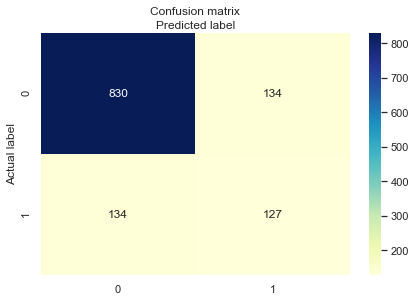

In [34]:
#Visualizing the Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(dt_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#From the above confusion matrix we can see that there 830 and 127 examples correctly predicted and 134 and 134 examples incorrectly predicted.

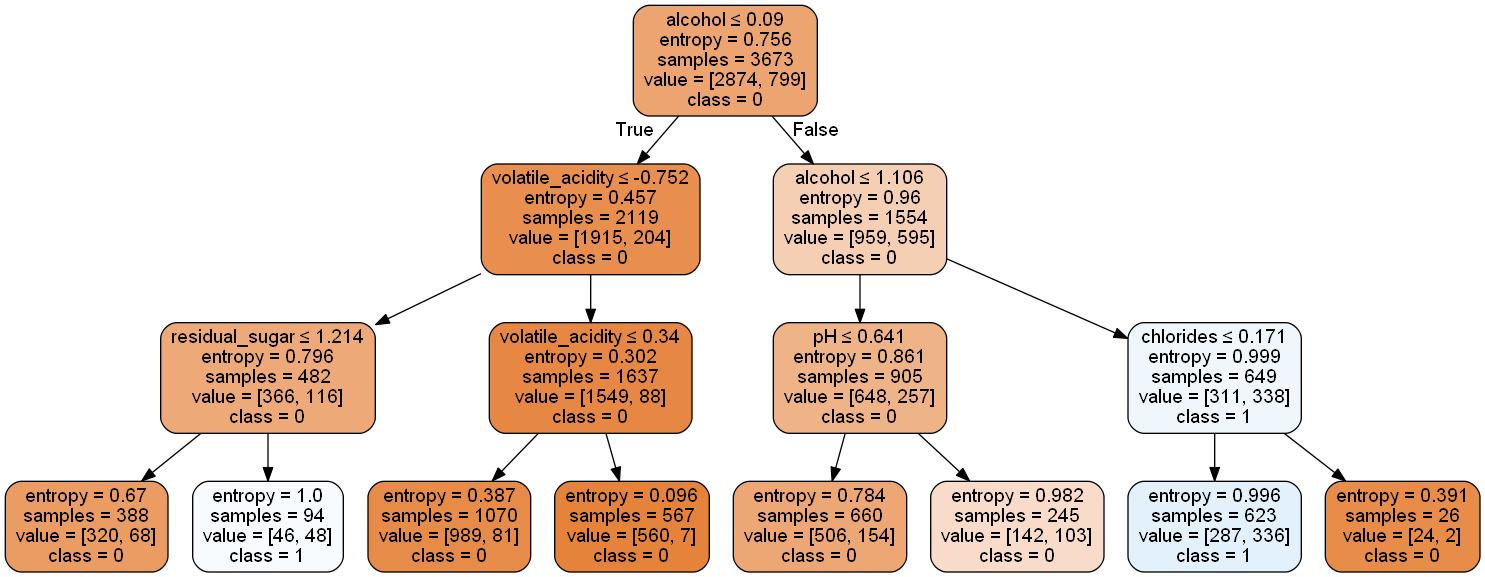

In [35]:
#Visualizing the Decision Tree

df_feature_names = [ 'fixed_acidity', 'volatile_acidity', 'citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol' ]

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from graphviz import *

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = df_feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wine_quality.png')
Image(graph.create_png()) 


#From the Decision Tree we conclude:
#Among all the features alcohol,volatile acidity,residual sugar,chlorides and ph best splits the data.
#Alcohol at a threshold of 0.09 and with 3673 samples has the highest entopy among all the features that split the data.
#with 2874 samples as bad wine and 799 samples as good wine.
#Volatile acid at a threshold of -0.752 unit and sample reduced to 2119 has a high entropy which further splits the data
#with 1915 bad wines and 204 good wines.
#residual sugar with a threshold of 1.214 units and high entropy of 0.796 with sample of 482 wines further splits the data.
#with 366 bad wines and 116 good wines.
#Finally we have 48 good quality wines out of a sample of 94 wines. The entropy is 1.0 which means it is a pure node.
#Chlorides at athreshold of 0.171 unit has high entropy of 0.999 and results in 336 good quality wines out of a sample of 623 wines.
#pH has a threshold of 0.641 with relatively high entropy of 0,861 and results in 103 good quality wines out of a sample 245 wines.

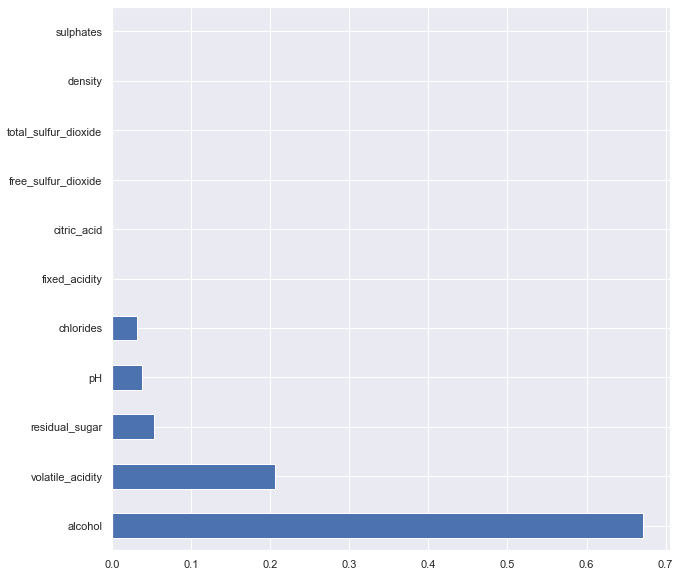

In [36]:
#Feature Importance
var_importances = pd.Series(dt.feature_importances_, index=X_features.columns)
var_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

#From the Bar chart we conclude:
#Good quality wines is produced with:
#relatively high alcohol content, 
#relatively low volatile acidity, 
#relatively high amount of residual sugar 
#and low levels of pH and chlorides.

# Conclusion:

#The Logistic Regression method gives a better model accuracy than decidion tree to predict good quality of wines.
#The features such as high alcohol content, low volatile acidity, relatively high amount of residual sugar and low levels of pH and chlorides results in good quality wine.